In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [6]:
!pip install read_wandb

ERROR: Could not find a version that satisfies the requirement read_wandb (from versions: none)
ERROR: No matching distribution found for read_wandb


In [4]:
import pandas as pd
import wandb
from tqdm import tqdm
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.colors as mcolors

In [8]:
from read_wandb import wandb_results
api = wandb_results("NLP2024_PROJECT_michalbar3", wandb_username="michalbar")

BASE_METRIC = "accuracy_per_mean_user_and_bot"

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [37]:

BASE_METRIC = "ENV_Test_accuracy"#"accuracy_per_mean_user_and_bot"
df = api.get_sweeps_results(["cne1ziqy"],metric=BASE_METRIC)

Total number of sweeps: 1
Download sweep_id='cne1ziqy' data...


In [38]:
#save df as csv
df.to_csv("sweeps_csvs/cne1ziqy11111.csv")

In [39]:
df.columns[:50]

Index(['name', 'config_seed', 'config_task', 'config_agent', 'config_layers',
       'config_dropout', 'config_features', 'config_input_dim',
       'config_max_games', 'config_REVIEW_DIM', 'config_hidden_dim',
       'config_output_dim', 'config_strategies', 'config_force_train',
       'config_ENV_HPT_mode', 'config_architecture', 'config_basic_nature',
       'config_total_epochs', 'config_wandb_run_id', 'config_FEATURES_PATH',
       'config_MAB_selection', 'config_bots_per_user', 'config_save_artifacts',
       'config_zero_knowledge', 'config_online_sim_type',
       'config_use_user_vector', 'config_human_train_size',
       'config_loss_weight_type', 'config_ENV_LEARNING_RATE',
       'config_personas_balanced', 'config_transformer_nheads',
       'config_SIMULATION_EFs_PATH', 'config_OFFLINE_SIM_DATA_PATH',
       'config_favorite_topic_method', 'config_personas_group_number',
       'config_online_simulation_size', 'config_prioritized_strategies',
       'config_offline_simul

range(0, 25)
range(0, 25)


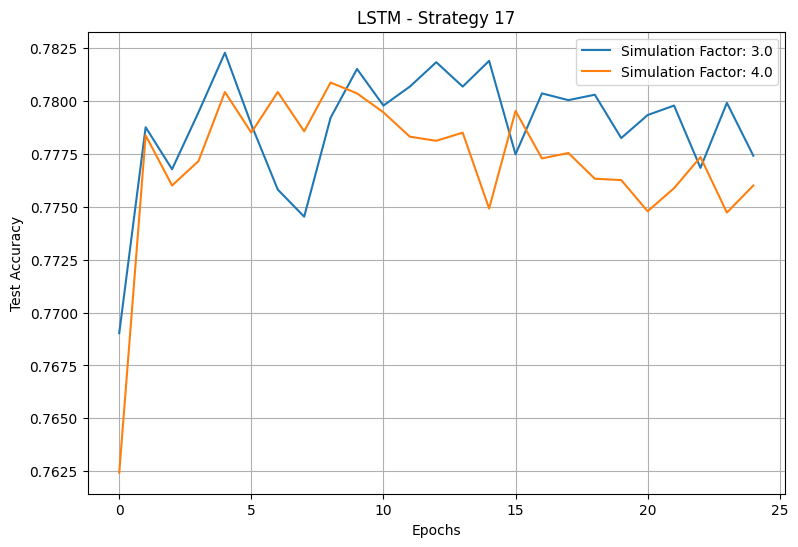

range(0, 25)
range(0, 25)


<Figure size 640x480 with 0 Axes>

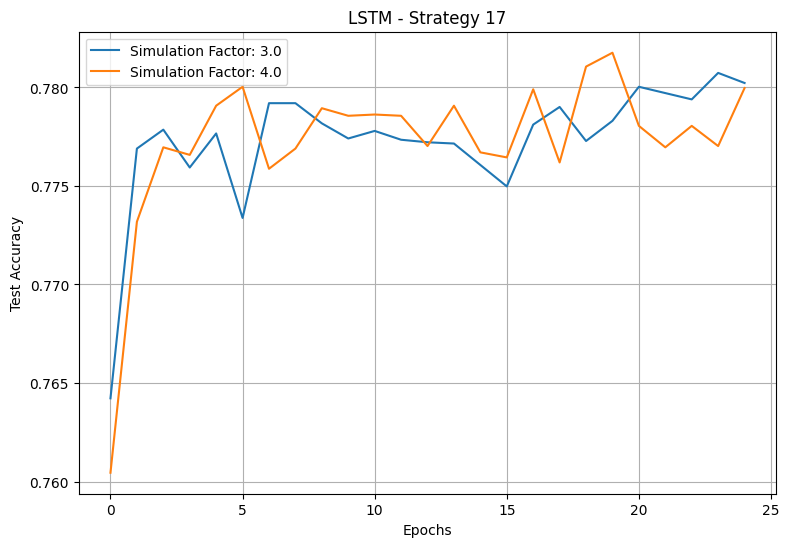

range(0, 25)
range(0, 25)


<Figure size 640x480 with 0 Axes>

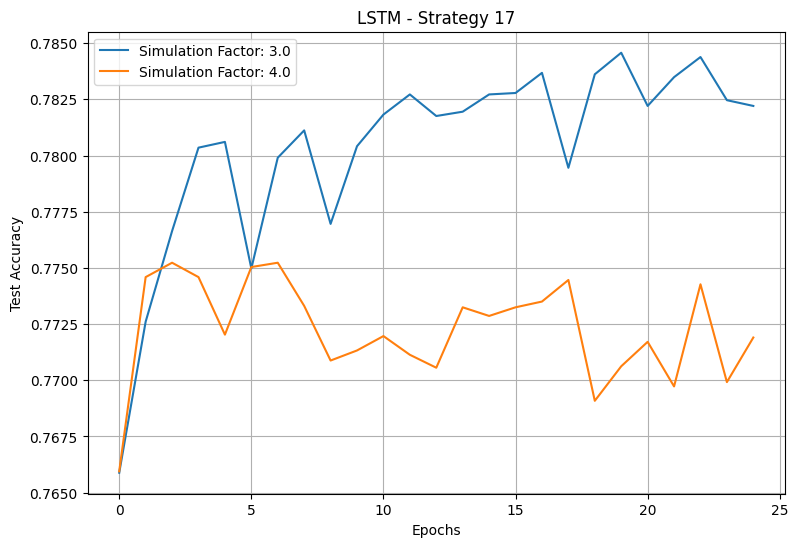

<Figure size 640x480 with 0 Axes>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sweeps_csvs/cne1ziqy_6.csv'
df = pd.read_csv(file_path)

# Define MetaDataFeatures and EpochAccuracyColumns
MetaDataFeatures = ['config_architecture', 'config_basic_nature', 'config_online_simulation_factor', 'config_seed', 'config_MAB_selection', 'config_prioritized_strategies']
EpochAccuracyColumns = [
    'ENV_Test_accuracy_epoch0', 'ENV_Test_accuracy_epoch1', 'ENV_Test_accuracy_epoch2', 'ENV_Test_accuracy_epoch3', 'ENV_Test_accuracy_epoch4',
    'ENV_Test_accuracy_epoch5', 'ENV_Test_accuracy_epoch6', 'ENV_Test_accuracy_epoch7', 'ENV_Test_accuracy_epoch8', 'ENV_Test_accuracy_epoch9',
    'ENV_Test_accuracy_epoch10', 'ENV_Test_accuracy_epoch11', 'ENV_Test_accuracy_epoch12', 'ENV_Test_accuracy_epoch13', 'ENV_Test_accuracy_epoch14',
    'ENV_Test_accuracy_epoch15', 'ENV_Test_accuracy_epoch16', 'ENV_Test_accuracy_epoch17', 'ENV_Test_accuracy_epoch18', 'ENV_Test_accuracy_epoch19',
    'ENV_Test_accuracy_epoch20', 'ENV_Test_accuracy_epoch21', 'ENV_Test_accuracy_epoch22', 'ENV_Test_accuracy_epoch23', 'ENV_Test_accuracy_epoch24'
]

features = MetaDataFeatures + EpochAccuracyColumns
GraphData = df[features]
GraphData = GraphData.rename(columns={"config_architecture": 'Architecture', "config_seed":"seed",'config_prioritized_strategies': 'Strategy_used', 'config_online_simulation_factor': 'Simulation_Factor'})

# Aggregating by simulation factor per file #
LSTMGraphsData0 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 0)]
LSTMGraphsData0Agg = LSTMGraphsData0[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

LSTMGraphsData1 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 1)]
LSTMGraphsData1Agg = LSTMGraphsData1[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()


LSTMGraphsData2 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 2)]
LSTMGraphsData2Agg = LSTMGraphsData2[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

# TransGraphsData17 = GraphData[(GraphData['Architecture'] == 'transformer') & (GraphData['Strategy_used'] == 17)]
# TransGraphsData17Agg = TransGraphsData17[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

# TransGraphsData18 = GraphData[(GraphData['Architecture'] == 'transformer') & (GraphData['Strategy_used'] == 18)]
# TransGraphsData18Agg = TransGraphsData18[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

# NisimTransGraphsData17 = GraphData[(GraphData['Architecture'] == 'nisim_transformer') & (GraphData['Strategy_used'] == 17)]
# NisimTransGraphsData17Agg = NisimTransGraphsData17[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

# NisimTransGraphsData18 = GraphData[(GraphData['Architecture'] == 'nisim_transformer') & (GraphData['Strategy_used'] == 18)]
# NisimTransGraphsData18Agg = NisimTransGraphsData18[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()
# print(range(len(epoch_columns)))
# Function to plot epoch accuracy
def plotEpochAcc(data, epoch_columns, architecture, strategy, fig_num):
    for index, row in data.iterrows():
        # print(range(len(epoch_columns)))
        plt.plot(range(len(epoch_columns)), row[epoch_columns], label=f'Simulation Factor: {row["Simulation_Factor"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.title(f'{architecture} - Strategy {strategy}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plots for strategy 17
plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData0Agg, EpochAccuracyColumns, 'LSTM', 0, 1)
plt.savefig("LSTM_0.png")

plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData1Agg, EpochAccuracyColumns, 'LSTM', 1, 2)
plt.savefig("LSTM_1.png")

plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData2Agg, EpochAccuracyColumns, 'LSTM', 2, 3)
plt.savefig("LSTM_2.png")

# # Plots for strategy 18
# plt.figure(figsize=(9, 6))
# plotEpochAcc(LSTMGraphsData18Agg, EpochAccuracyColumns, 'LSTM', 18, 1)
# plt.savefig("LSTM_18.png")

# plt.figure(figsize=(9, 6))
# plotEpochAcc(TransGraphsData18Agg, EpochAccuracyColumns, 'Transformer', 18, 2)
# plt.savefig("Transformer_18.png")

# plt.figure(figsize=(9, 6))
# plotEpochAcc(NisimTransGraphsData18Agg, EpochAccuracyColumns, 'M-Transformer', 18, 3)
# plt.savefig("M-Transformer_18.png")


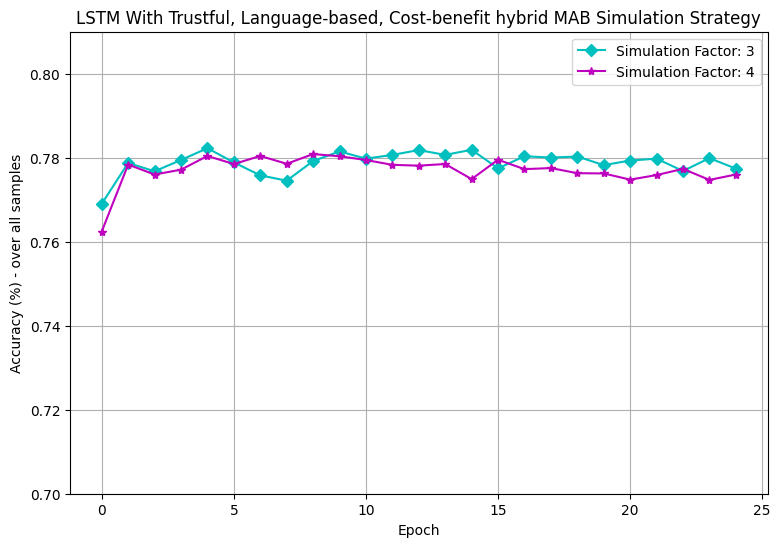

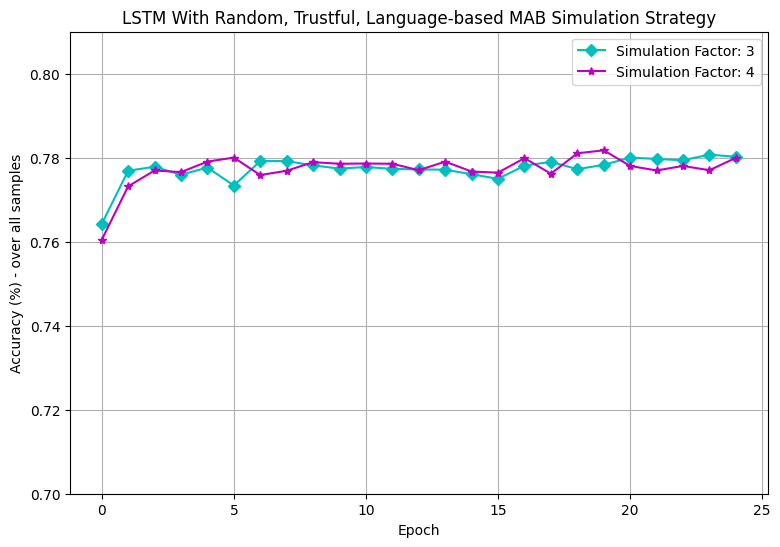

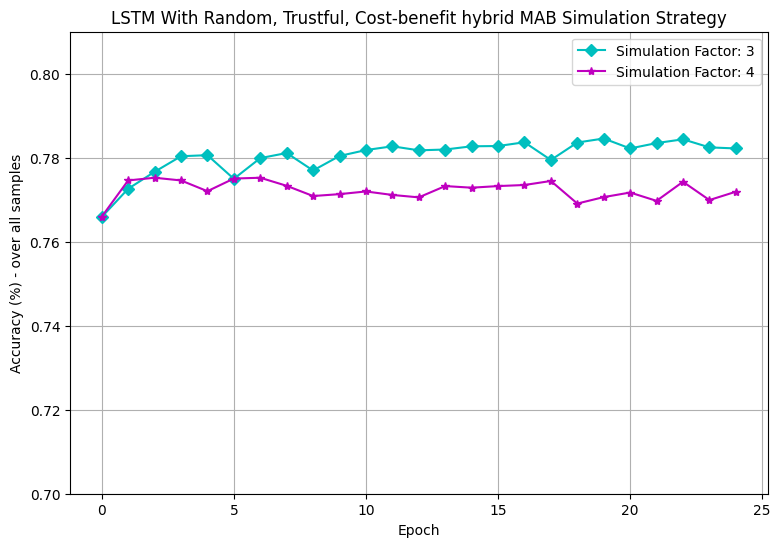

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sweeps_csvs/cne1ziqy_6.csv'
df = pd.read_csv(file_path)

# Define MetaDataFeatures and EpochAccuracyColumns
MetaDataFeatures = ['config_architecture', 'config_basic_nature', 'config_online_simulation_factor', 'config_seed', 'config_MAB_selection', 'config_prioritized_strategies']
EpochAccuracyColumns = [
    'ENV_Test_accuracy_epoch0', 'ENV_Test_accuracy_epoch1', 'ENV_Test_accuracy_epoch2', 'ENV_Test_accuracy_epoch3', 'ENV_Test_accuracy_epoch4',
    'ENV_Test_accuracy_epoch5', 'ENV_Test_accuracy_epoch6', 'ENV_Test_accuracy_epoch7', 'ENV_Test_accuracy_epoch8', 'ENV_Test_accuracy_epoch9',
    'ENV_Test_accuracy_epoch10', 'ENV_Test_accuracy_epoch11', 'ENV_Test_accuracy_epoch12', 'ENV_Test_accuracy_epoch13', 'ENV_Test_accuracy_epoch14',
    'ENV_Test_accuracy_epoch15', 'ENV_Test_accuracy_epoch16', 'ENV_Test_accuracy_epoch17', 'ENV_Test_accuracy_epoch18', 'ENV_Test_accuracy_epoch19',
    'ENV_Test_accuracy_epoch20', 'ENV_Test_accuracy_epoch21', 'ENV_Test_accuracy_epoch22', 'ENV_Test_accuracy_epoch23', 'ENV_Test_accuracy_epoch24'
]

features = MetaDataFeatures + EpochAccuracyColumns
GraphData = df[features]
GraphData = GraphData.rename(columns={"config_architecture": 'Architecture', "config_seed":"seed", 'config_prioritized_strategies': 'Strategy_used', 'config_online_simulation_factor': 'Simulation_Factor'})

# Aggregating by simulation factor per file #
LSTMGraphsData0 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 0)]
LSTMGraphsData0Agg = LSTMGraphsData0[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

LSTMGraphsData1 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 1)]
LSTMGraphsData1Agg = LSTMGraphsData1[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

LSTMGraphsData2 = GraphData[(GraphData['Architecture'] == 'LSTM') & (GraphData['Strategy_used'] == 2)]
LSTMGraphsData2Agg = LSTMGraphsData2[EpochAccuracyColumns + ['Simulation_Factor']].groupby(['Simulation_Factor']).mean().reset_index()

# Function to plot epoch accuracy
def plotEpochAcc(data, epoch_columns, architecture, strategy, fig_num):
    dic_strategy={0: "Trustful, Language-based, Cost-benefit hybrid", 1: "Random, Trustful, Language-based",2: "Random, Trustful, Cost-benefit hybrid"}
    markers = ['o', 's', '^', 'D', '*', 'X', 'P']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for index, row in data.iterrows():
        sim_factor = int(row['Simulation_Factor'])
        plt.plot(range(len(epoch_columns)), row[epoch_columns], label=f'Simulation Factor: {sim_factor}', marker=markers[sim_factor % len(markers)], color=colors[sim_factor % len(colors)], linestyle='-')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%) - over all samples')
    plt.title(f'{architecture} With {dic_strategy[strategy]} MAB Simulation Strategy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.7, 0.81)  # Adjusted y-axis limits based on the example image
    plt.savefig(f"{architecture}_Strategy_{strategy}.png")
    plt.show()

# Plots for strategy 0
plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData0Agg, EpochAccuracyColumns, 'LSTM', 0, 1)

# Plots for strategy 1
plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData1Agg, EpochAccuracyColumns, 'LSTM', 1, 2)

# Plots for strategy 2
plt.figure(figsize=(9, 6))
plotEpochAcc(LSTMGraphsData2Agg, EpochAccuracyColumns, 'LSTM', 2, 3)


In [ ]:
# def result_metric(sweeps, group_name, drop_list=[0], drop_HPT=False, metric=BASE_METRIC, epoch="best"):
#     df = api.get_sweeps_results(sweeps, metric=metric)
#
#     config_cols = [c for c in df.columns if "config_" in c and c!="config_wandb_run_id" and c!="config_online_simulation_size"]
#     HPT_cols = [col for col in config_cols if df[col].nunique() > 1]
#     print(HPT_cols)
#     if drop_HPT:
#         df=df.drop([c for c in HPT_cols if not c in ["config_LLM_SIM_SIZE", "config_seed"]], axis=1)
#         HPT_cols = ["config_LLM_SIM_SIZE", "config_seed"]
#
#     grouped = df.groupby([c for c in HPT_cols if c != "config_seed"])
#
#     mean_df = grouped.mean()
#     std_df = grouped.std()
#     if epoch=="best":
#         best_col = mean_df[[c for c in mean_df.columns if (metric in c and metric[-4:] == c.split("_epoch")[0][-4:])]].idxmax(axis=1)
#     else:
#         best_col = mean_df[[c for c in mean_df.columns if f"{metric}_epoch{epoch}" in c]].idxmax(axis=1)
#
#     result = grouped.apply(lambda x: x[best_col.loc[x.name]].values)
#     means = grouped.apply(lambda x: x[best_col.loc[x.name]].mean())
#     stds = grouped.apply(lambda x: x[best_col.loc[x.name]].std())
#
#
#     df_cols = {'mean': means, 'std': stds, 'values': result.values}
#     if epoch == "best": df_cols['epoch'] = best_col.apply(lambda x: int(x.split("epoch")[1]) if "epoch" in x else "last")
#
#     df_cols['CI'] = result.apply(lambda x: bootstrap_ci(x))
#
#     summary_df = pd.DataFrame(df_cols, index=best_col.index)
#     for d in drop_list:
#         if d in summary_df.index:
#             summary_df=summary_df.drop(d)
#     if len(summary_df.index.names) == 1:
#         return summary_df.rename_axis(group_name)
#     else:
#         return summary_df
#
# def bootstrap_ci(data, n_bootstrap=1000, ci=0.95):
#     bootstrapped_means = []
#     for _ in range(n_bootstrap):
#         sample = np.random.choice(data, size=len(data), replace=True)
#         bootstrapped_means.append(np.mean(sample))
#     lower_bound = np.percentile(bootstrapped_means, (1 - ci) / 2 * 100)
#     upper_bound = np.percentile(bootstrapped_means, (1 + ci) / 2 * 100)
#     return lower_bound, upper_bound

In [9]:
def result_metric(sweeps, group_name, drop_list=[0], drop_HPT=False, metric=BASE_METRIC, epoch="best"):
    df = api.get_sweeps_results(sweeps, metric=metric)

    config_cols = [c for c in df.columns if "config_" in c and c!="config_wandb_run_id" and c!="config_online_simulation_size"]
    HPT_cols = [col for col in config_cols if df[col].nunique() > 1]
    print(HPT_cols)
    if drop_HPT:
        df=df.drop([c for c in HPT_cols if not c in ["config_LLM_SIM_SIZE", "config_seed"]], axis=1)
        HPT_cols = ["config_LLM_SIM_SIZE", "config_seed"]

    # Remove non-numeric columns before computing mean and std
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_numeric = df[numeric_cols]

    grouped = df_numeric.groupby([c for c in HPT_cols if c != "config_seed"])

    mean_df = grouped.mean()
    std_df = grouped.std()

    # Re-add non-numeric columns before computing best_col
    for col in config_cols:
        if col not in mean_df.columns:
            mean_df[col] = df[col]

    if epoch=="best":
        best_col = mean_df[[c for c in mean_df.columns if (metric in c and metric[-4:] == c.split("_epoch")[0][-4:])]].idxmax(axis=1)
    else:
        best_col = mean_df[[c for c in mean_df.columns if f"{metric}_epoch{epoch}" in c]].idxmax(axis=1)

    result = grouped.apply(lambda x: x[best_col.loc[x.name]].values)
    means = grouped.apply(lambda x: x[best_col.loc[x.name]].mean())
    stds = grouped.apply(lambda x: x[best_col.loc[x.name]].std())


    df_cols = {'mean': means, 'std': stds, 'values': result.values}
    if epoch == "best": df_cols['epoch'] = best_col.apply(lambda x: int(x.split("epoch")[1]) if "epoch" in x else "last")

    df_cols['CI'] = result.apply(lambda x: bootstrap_ci(x))

    summary_df = pd.DataFrame(df_cols, index=best_col.index)
    for d in drop_list:
        if d in summary_df.index:
            summary_df=summary_df.drop(d)
    if len(summary_df.index.names) == 1:
        return summary_df.rename_axis(group_name)
    else:
        return summary_df

def bootstrap_ci(data, n_bootstrap=1000, ci=0.95):
    bootstrapped_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))
    lower_bound = np.percentile(bootstrapped_means, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + ci) / 2 * 100)
    return lower_bound, upper_bound


# For HyperParameterTuning

For every configuration that you test in the sweep, you will receive in the table the average, standard deviation, all the values obtained for the different seed values, and also the confidence interval within which the result is located at a confidence level of 95%.

When epoch="best" is defined, you can check in which epoch the best result is obtained. If epoch=5 is defined, you will receive the result obtained for epoch number 5.

You can test multiple sweeps simultaneously by entering them into the list found in the first element of the function result_metric.

In [12]:
# Create the directory if it doesn't exist
directory = 'sweeps_csvs'
if not os.path.exists(directory):
    os.makedirs(directory)

sweep_results = result_metric(["cne1ziqy"], "Hidden dim", drop_HPT=False, epoch="best")
sweep_results

Total number of sweeps: 1
Download sweep_id='cne1ziqy' data...


100%|██████████| 6/6 [00:00<00:00, 990.08it/s]


['config_prioritized_strategies', 'config_online_simulation_factor']


mean  std  \
config_prioritized_strategies config_online_simulation_factor                  
1                             3                                0.834299  NaN   
                              4                                0.832886  NaN   
2                             3                                0.835139  NaN   
                              4                                0.831727  NaN   

                                                                             values  \
config_prioritized_strategies config_online_simulation_factor                         
1                             3                                [0.8342993940987112]   
                              4                                [0.8328856085948175]   
2                             3                                [0.8351393048106937]   
                              4                                [0.8317268566186724]   

                                                              epoch  \
config_prioritized_strategies config_online_simulation_factor         
1                             3                                last   
                              4                                  11   
2                             3                                  14   
                              4                                  15   

                                                                                                     CI  
config_prioritized_strategies config_online_simulation_factor                                            
1                             3                                (0.8342993940987112, 0.8342993940987112)  
                              4                                (0.8328856085948175, 0.8328856085948175)  
2                             3                                (0.8351393048106937, 0.8351393048106937)  
                              4                                (0.8317268566186724, 0.8317268566186724)

# Result for a specific epoch

In [15]:
sweep_results = result_metric(["cne1ziqy"], "Hidden dim", drop_HPT=False, epoch=1)
sweep_results

Total number of sweeps: 1
Download sweep_id='cne1ziqy' data...
['config_prioritized_strategies', 'config_online_simulation_factor']


mean  std  \
config_prioritized_strategies config_online_simulation_factor                  
1                             3                                0.832009  NaN   
                              4                                0.832886  NaN   
2                             3                                0.835139  NaN   
                              4                                0.831727  NaN   

                                                                             values  \
config_prioritized_strategies config_online_simulation_factor                         
1                             3                                 [0.832008645398843]   
                              4                                [0.8328856085948175]   
2                             3                                [0.8351393048106937]   
                              4                                [0.8317268566186724]   

                                                                                                     CI  
config_prioritized_strategies config_online_simulation_factor                                            
1                             3                                  (0.832008645398843, 0.832008645398843)  
                              4                                (0.8328856085948175, 0.8328856085948175)  
2                             3                                (0.8351393048106937, 0.8351393048106937)  
                              4                                (0.8317268566186724, 0.8317268566186724)